In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
#load json file 
import json
with open('kernel_evaluation_results_mi_no_pool_reg.json', 'r') as f:
    results = json.load(f)
#print results
print(results)


[{'model': 'convnextv2_base', 'mean_accuracy': 63.77212905883789, 'mean_mse': 0.8722226023674011, 'accuracies': [69.75164031982422, 74.17484283447266, 66.8648910522461, 69.14768981933594, 51.027584075927734, 51.69147491455078, 69.52558898925781, 66.09514617919922, 65.73715209960938, 67.92674255371094, 66.93838500976562, 57.837276458740234, 65.89276885986328, 52.72090530395508, 60.07058334350586, 64.96101379394531, 59.89439392089844, 70.07197570800781, 72.49540710449219, 58.47371292114258, 65.70036315917969, 70.92132568359375, 68.35742950439453, 63.66258239746094, 68.45684814453125, 52.87846374511719, 66.13057708740234, 71.18643951416016, 57.05095291137695, 68.66163635253906, 64.12269592285156, 67.38351440429688, 63.12300491333008, 62.817039489746094, 67.31314849853516, 62.55842590332031, 73.73783111572266, 50.82857894897461, 72.81841278076172, 55.7796745300293, 58.423213958740234, 59.767208099365234, 65.48025512695312, 68.4808349609375, 69.01969909667969, 73.46892547607422, 67.43577575

In [110]:
# make into dataframe
# Convert results to a DataFrame
df = pd.DataFrame()

# Extract data from each result
for result in results:
    # Create a temporary DataFrame for this result
    temp_df = pd.DataFrame({
        'model': result['model'],
        'mean_accuracy': result['mean_accuracy'],
        #'mean_mse': result['mean_mse'],
        'accuracies': [result['accuracies']]
    }, index=[0])
    
    # Append to the main DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

# Display the DataFrame
df.head()

,model,mean_accuracy,accuracies
0,convnextv2_base,63.772129,"[69.75164031982422, 74.17484283447266, 66.8648..."
1,wide_resnet101_2,71.434929,"[74.20337677001953, 77.78768920898438, 72.9067..."
2,deit_small_patch16_224,58.025276,"[67.9006576538086, 76.36038970947266, 63.79638..."
3,regnety_032,67.747368,"[71.25117492675781, 76.02587127685547, 69.2911..."
4,deit_tiny_patch16_224,55.439243,"[66.23711395263672, 77.6092758178711, 64.12940..."


In [111]:
# Sort the dataframe by mean_accuracy in ascending order (lowest first)
df = df.sort_values(by='mean_accuracy', ascending=True)

to_drop = ['inception_next_small', 'inception_next_atto']
df = df[~df['model'].isin(to_drop)]
df

,model,mean_accuracy,accuracies
4,deit_tiny_patch16_224,55.439243,"[66.23711395263672, 77.6092758178711, 64.12940..."
2,deit_small_patch16_224,58.025276,"[67.9006576538086, 76.36038970947266, 63.79638..."
11,pvt_v2_b2,59.313061,"[67.5023422241211, 75.84745788574219, 64.48620..."
25,resnet34,59.725304,"[66.7291488647461, 74.59857177734375, 63.15414..."
32,resnet18,59.771900,"[66.84629821777344, 74.26405334472656, 63.8201..."
20,beit_base_patch16_224,61.061695,"[68.65042114257812, 77.07404327392578, 66.1037..."
27,convnext_small,61.439007,"[68.22867584228516, 75.2899169921875, 66.22264..."
28,vit_base_patch16_224,61.836563,"[68.39269256591797, 74.53166961669922, 66.2702..."
26,swin_tiny_patch4_window7_224,61.866280,"[67.99437713623047, 74.68778228759766, 66.3653..."
5,mixer_b16_224,62.163422,"[68.65042114257812, 74.24174499511719, 64.9381..."


In [ ]:
# Calculate variance of accuracies and add to dataframe
df['acc_var'] = df['accuracies'].apply(np.var)

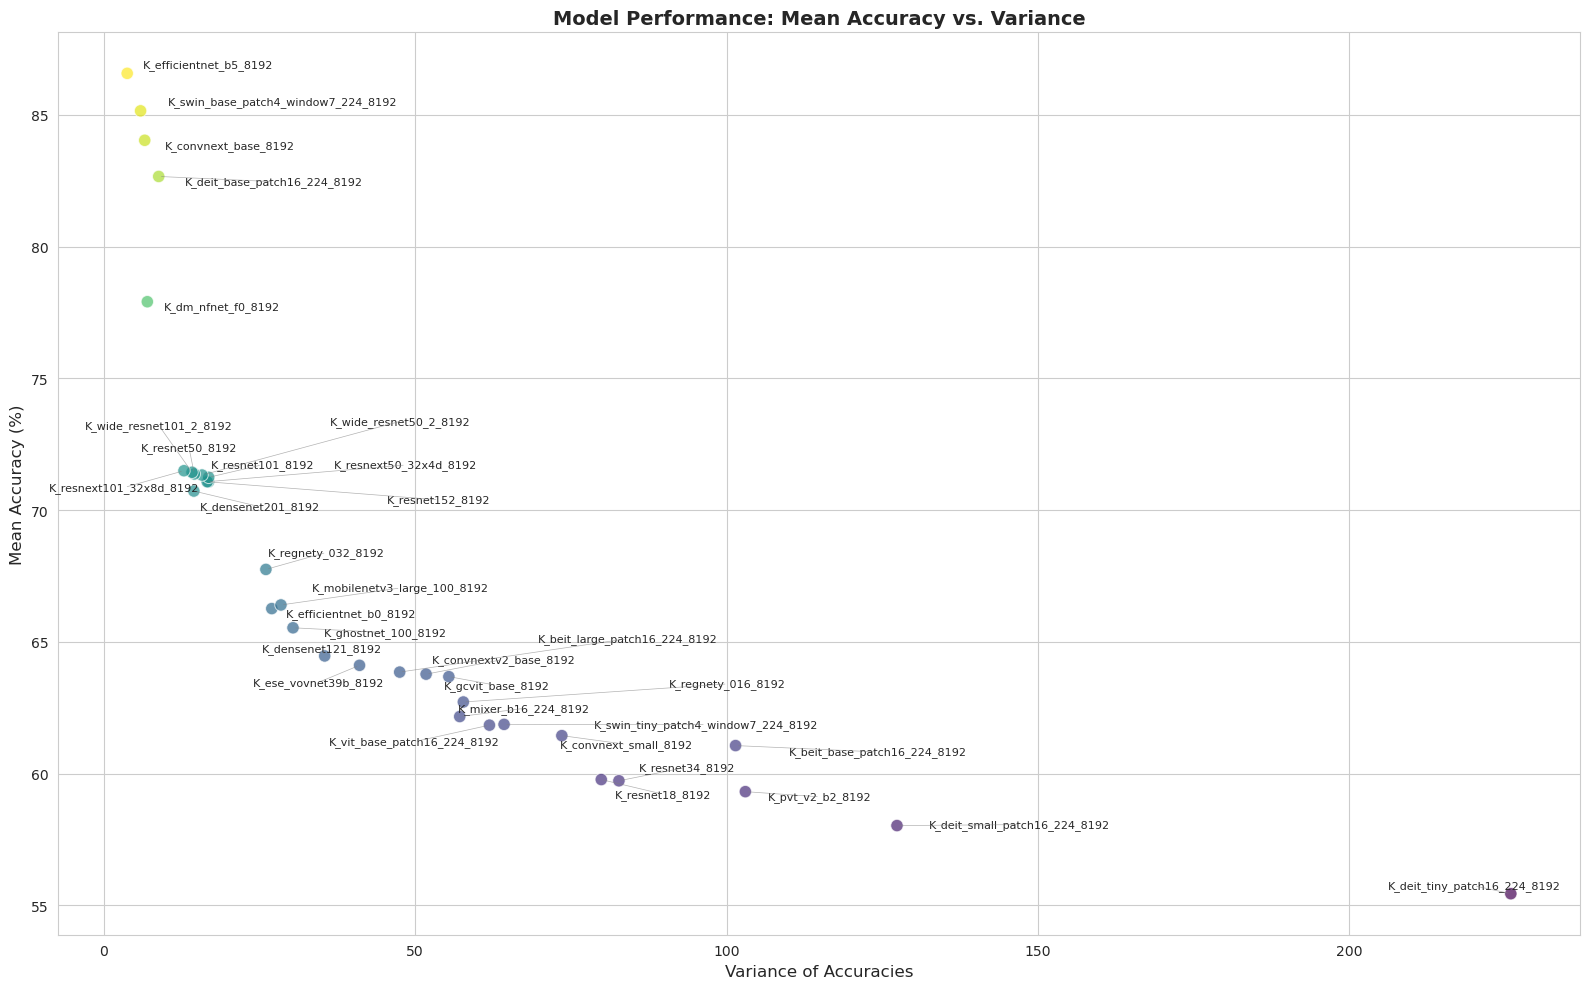

In [ ]:
# PLOT 1

import seaborn as sns
import numpy as np
from adjustText import adjust_text

# Set the style
sns.set_style("whitegrid")

# Create figure with larger size for better label spacing
plt.figure(figsize=(16, 10))

# Create scatter plot with seaborn
scatter = sns.scatterplot(
    data=df,
    x='acc_var',
    y='mean_accuracy',
    alpha=0.7,
    s=80,  # Point size
    hue='mean_accuracy',  # Color by accuracy
    palette='viridis'
)

# Add labels for all models
texts = []
for i, row in df.iterrows():
    texts.append(plt.text(row['acc_var'], row['mean_accuracy'], row['model'], fontsize=8))

# Adjust text positions to minimize overlap with more iterations and force
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6, lw=0.5),
            expand_points=(1.5, 1.5),
            force_points=(0.5, 0.5),
            force_text=(0.5, 0.8),
            force_objects=(0.5, 0.5),
            lim=500)  # More iterations for better placement

# Add title and labels with better formatting
#plt.title('Model Performance: Mean Accuracy vs. Variance', fontsize=14, fontweight='bold')
plt.xlabel('Variance of Accuracies', fontsize=12)
plt.ylabel('Mean Accuracy (%)', fontsize=12)

# Remove the legend for the hue parameter (it's redundant with y-axis)
plt.legend([],[], frameon=False)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

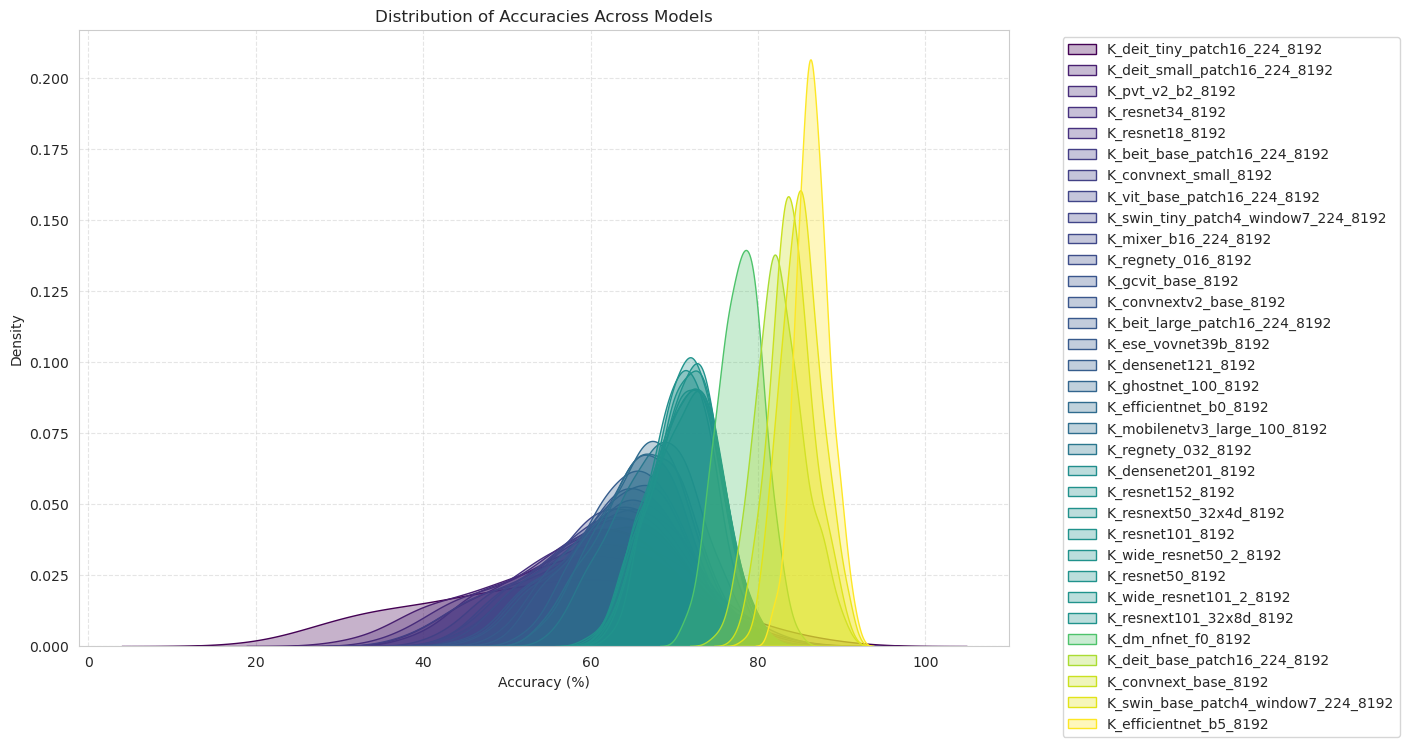

In [129]:
# PLOT 2

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

# Create a figure
plt.figure(figsize=(12, 8))

# Get colormap
cmap = cm.viridis

# Get min and max accuracy for normalization
min_acc = df['mean_accuracy'].min()
max_acc = df['mean_accuracy'].max()

# Plot KDE for each model's accuracies
for i, row in df.iterrows():
    model_name = row['model']
    accuracies = row['accuracies']
    mean_acc = row['mean_accuracy']
    
    # Normalize mean accuracy to 0-1 range for color mapping
    norm_acc = (mean_acc - min_acc) / (max_acc - min_acc)
    color = cmap(norm_acc)
    
    # Create KDE plot with color based on mean accuracy
    sns.kdeplot(accuracies, label=model_name, fill=True, alpha=0.3, color=color)

# Add title and labels
plt.title('Distribution of Accuracies Across Models')
plt.xlabel('Accuracy (%)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add colorbar to show mean accuracy scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(min_acc, max_acc))
sm.set_array([])
cbar = plt.colorbar(sm, label='Mean Accuracy (%)')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_130812/4057234392.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


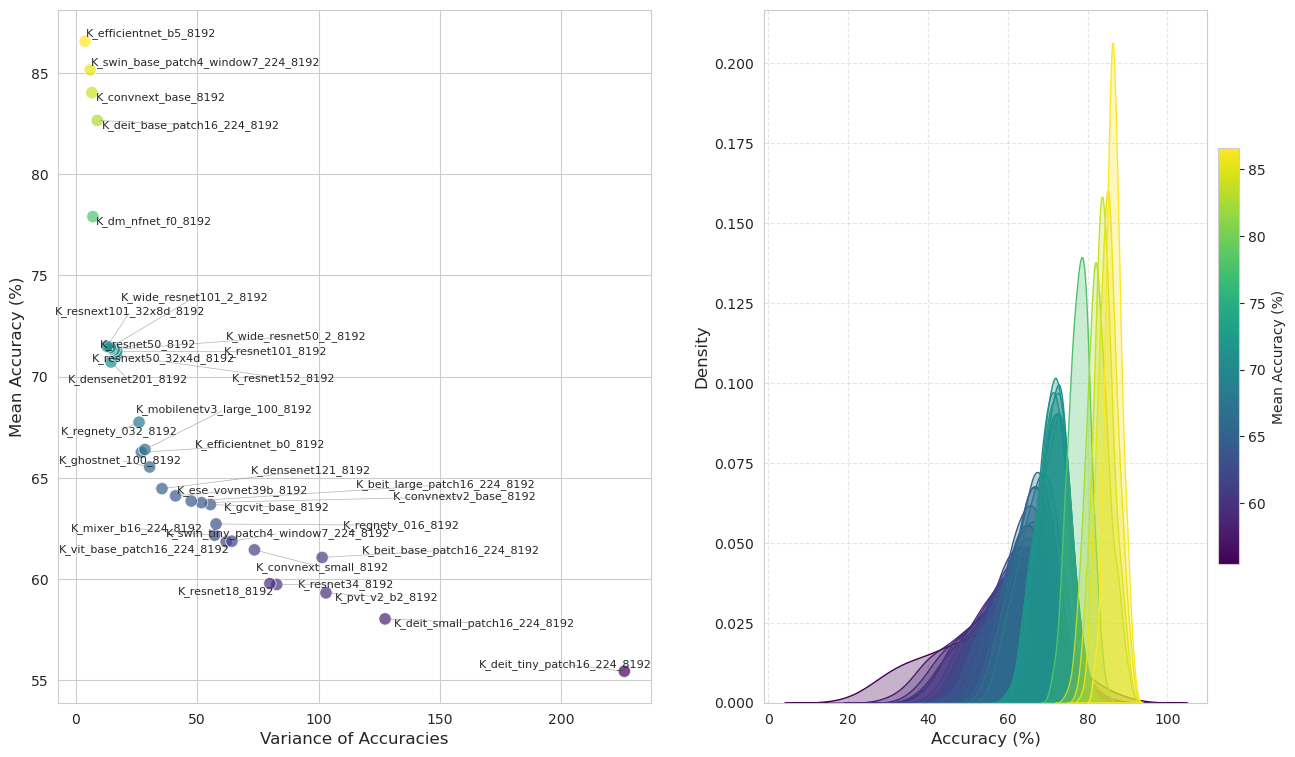

In [146]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9), gridspec_kw={'width_ratios': [1, .9], 'wspace': 0.2})

# Get colormap
cmap = cm.viridis

# Get min and max accuracy for normalization
min_acc = df['mean_accuracy'].min()
max_acc = df['mean_accuracy'].max()
norm = plt.Normalize(min_acc, max_acc)

# PLOT 1 (Left): Scatter plot
sns.set_style("whitegrid")

# Create scatter plot with seaborn on the first axis
scatter = sns.scatterplot(
    data=df,
    x='acc_var',
    y='mean_accuracy',
    alpha=0.7,
    s=80,  # Point size
    hue='mean_accuracy',  # Color by accuracy
    palette='viridis',
    ax=ax1
)

# Add labels for all models
texts = []
for i, row in df.iterrows():
    texts.append(ax1.text(row['acc_var'], row['mean_accuracy'], row['model'], fontsize=8))

# Adjust text positions to minimize overlap
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6, lw=0.5),
            expand_points=(1.5, 1.5),
            force_points=(0.5, 0.5),
            force_text=(0.5, 0.8),
            force_objects=(0.5, 0.5),
            lim=500,
            ax=ax1)

# Add title and labels with better formatting
#ax1.set_title('Model Performance: Mean Accuracy vs. Variance', fontsize=14, fontweight='bold')
ax1.set_xlabel('Variance of Accuracies', fontsize=12)
ax1.set_ylabel('Mean Accuracy (%)', fontsize=12)

# Remove the legend for the hue parameter (it's redundant with y-axis)
ax1.legend([], [], frameon=False)

# PLOT 2 (Right): KDE plot
# Plot KDE for each model's accuracies on the second axis
for i, row in df.iterrows():
    model_name = row['model']
    accuracies = row['accuracies']
    mean_acc = row['mean_accuracy']
    
    # Use the same normalization as in the scatter plot
    color = cmap(norm(mean_acc))
    
    # Create KDE plot with color based on mean accuracy
    sns.kdeplot(accuracies, label=model_name, fill=True, alpha=0.3, color=color, ax=ax2)

# Add title and labels
#ax2.set_title('Distribution of Accuracies Across Models', fontsize=14, fontweight='bold')
ax2.set_xlabel('Accuracy (%)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)

# Add legend
#ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add colorbar to show mean accuracy scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# Position the colorbar on the right side of the figure
cbar = fig.colorbar(sm, ax=ax2, label='Mean Accuracy (%)', pad=0.02, shrink=0.6)

# Improve layout
plt.tight_layout()

# Save the plot as PDF
plt.savefig('model_performance_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



In [116]:
df['model'] = df['model'] + "_8192"

In [117]:
df['model'] = "K_" + df['model']

In [118]:
df['model'].values

array(['K_deit_tiny_patch16_224_8192', 'K_deit_small_patch16_224_8192',
       'K_pvt_v2_b2_8192', 'K_resnet34_8192', 'K_resnet18_8192',
       'K_beit_base_patch16_224_8192', 'K_convnext_small_8192',
       'K_vit_base_patch16_224_8192',
       'K_swin_tiny_patch4_window7_224_8192', 'K_mixer_b16_224_8192',
       'K_regnety_016_8192', 'K_gcvit_base_8192',
       'K_convnextv2_base_8192', 'K_beit_large_patch16_224_8192',
       'K_ese_vovnet39b_8192', 'K_densenet121_8192',
       'K_ghostnet_100_8192', 'K_efficientnet_b0_8192',
       'K_mobilenetv3_large_100_8192', 'K_regnety_032_8192',
       'K_densenet201_8192', 'K_resnet152_8192', 'K_resnext50_32x4d_8192',
       'K_resnet101_8192', 'K_wide_resnet50_2_8192', 'K_resnet50_8192',
       'K_wide_resnet101_2_8192', 'K_resnext101_32x8d_8192',
       'K_dm_nfnet_f0_8192', 'K_deit_base_patch16_224_8192',
       'K_convnext_base_8192', 'K_swin_base_patch4_window7_224_8192',
       'K_efficientnet_b5_8192'], dtype=object)

In [119]:
df['mean_accuracy'].values

array([55.43924332, 58.02527618, 59.31306076, 59.72530365, 59.77190018,
       61.0616951 , 61.43900681, 61.83656311, 61.8662796 , 62.16342163,
       62.71563339, 63.67829895, 63.77212906, 63.85028839, 64.10680389,
       64.46328735, 65.5326767 , 66.26106262, 66.39875793, 67.74736786,
       70.72195435, 71.07073975, 71.0758667 , 71.24276733, 71.32904053,
       71.37088013, 71.43492889, 71.49388123, 77.90781403, 82.66225433,
       84.03491211, 85.15244293, 86.57562256])

In [120]:
df['acc_var'].values

array([225.93507806, 127.37279293, 103.02852848,  82.72487797,
        79.89186632, 101.45232765,  73.55732815,  61.93639821,
        64.28293083,  57.16151812,  57.74531554,  55.41580796,
        51.76430813,  47.52105376,  41.07507344,  35.47825843,
        30.39168891,  26.98277716,  28.45961432,  26.04047471,
        14.47339675,  16.82304884,  16.61298327,  16.85213084,
        15.79075691,  14.54687022,  14.17648595,  12.88689402,
         7.00417503,   8.8294982 ,   6.58378618,   5.91661007,
         3.77199792])